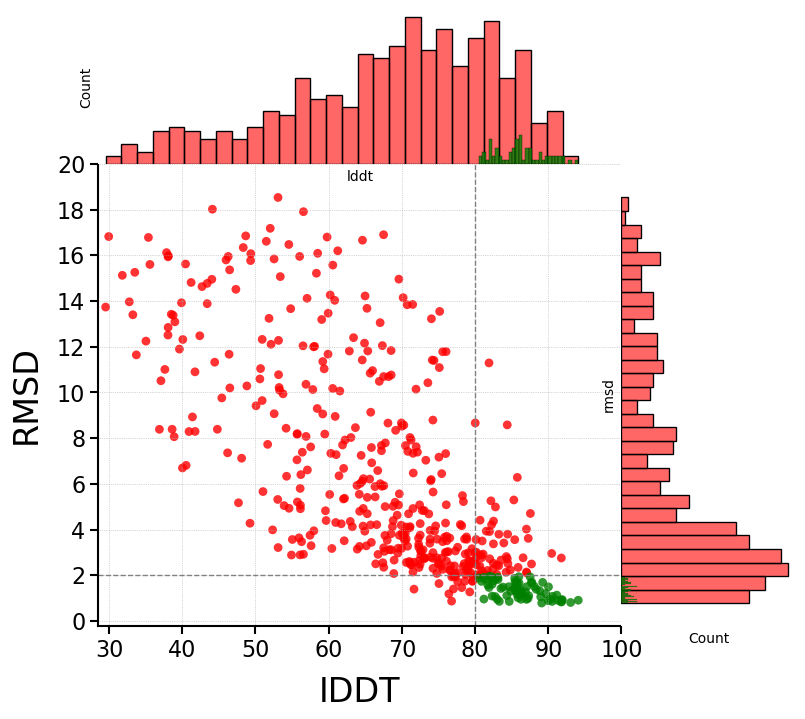

Saved: /Users/ayodi/OneDrive/Documents/ccb_intro/rf_diffusion/af2_output/batch_3\rmsd_lddt_beautiful_plot.tiff


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec
import numpy as np
import os

# Path to your data
csv_path = "/Users/Documents/rf_diffusion/af2_output/batch_3/data_3_full.csv"
df = pd.read_csv(csv_path)

# Clean and convert
df.columns = [c.strip().lower() for c in df.columns]
df['lddt'] = pd.to_numeric(df['lddt'], errors='coerce')
df['rmsd'] = pd.to_numeric(df['rmsd'], errors='coerce')
df.dropna(subset=['lddt', 'rmsd'], inplace=True)

# Highlight condition: green for iDDT > 80 and RMSD < 2
df['color'] = df.apply(lambda row: 'green' if row['lddt'] > 80 and row['rmsd'] < 2 else 'red', axis=1)

# ========== PLOT SETUP ==========
fig = plt.figure(figsize=(9, 8))
gs = GridSpec(4, 4, figure=fig, wspace=0.0, hspace=0.0)

# ========== MAIN SCATTER ==========
ax_main = fig.add_subplot(gs[1:4, 0:3])
for clr in ['red', 'green']:
    sub = df[df['color'] == clr]
    ax_main.scatter(sub['lddt'], sub['rmsd'], s=40, alpha=0.8, color=clr, edgecolor='none')

# Guide lines
ax_main.axhline(2, color='gray', linestyle='--', linewidth=1)
ax_main.axvline(80, color='gray', linestyle='--', linewidth=1)

# Ticks and limits
ax_main.set_xlim(df['lddt'].min() - 1, df['lddt'].max() + 1)
ax_main.set_ylim(df['rmsd'].min() - 1, df['rmsd'].max() + 1)
ax_main.set_xticks(np.arange(30, 101, 10))
ax_main.set_yticks(np.arange(0, 21, 2))
ax_main.tick_params(axis='both', direction='out', length=6, width=1.5, labelsize=16)

# Axis labels
ax_main.set_xlabel('IDDT', fontsize=24, labelpad=10)
ax_main.set_ylabel('RMSD', fontsize=24, labelpad=10)

# Frame styling
for spine in ['left', 'bottom']:
    ax_main.spines[spine].set_visible(True)
    ax_main.spines[spine].set_color('black')
    ax_main.spines[spine].set_linewidth(1.5)
for spine in ['top', 'right']:
    ax_main.spines[spine].set_visible(False)

ax_main.grid(True, linestyle=':', linewidth=0.5)

# ========== TOP HISTOGRAM ==========
ax_histx = fig.add_subplot(gs[0, 0:3], sharex=ax_main)
sns.histplot(data=df, x='lddt', bins=30, ax=ax_histx, color='red', edgecolor='black', alpha=0.6)
sns.histplot(data=df[df['color'] == 'green'], x='lddt', bins=30, ax=ax_histx, color='green', edgecolor='black', alpha=0.8)

ax_histx.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)
for spine in ax_histx.spines.values():
    spine.set_visible(False)

# ========== RIGHT HISTOGRAM ==========
ax_histy = fig.add_subplot(gs[1:4, 3], sharey=ax_main)
sns.histplot(data=df, y='rmsd', bins=30, ax=ax_histy, color='red', edgecolor='black', alpha=0.6)
sns.histplot(data=df[df['color'] == 'green'], y='rmsd', bins=30, ax=ax_histy, color='green', edgecolor='black', alpha=0.8)

ax_histy.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)
for spine in ax_histy.spines.values():
    spine.set_visible(False)

# ========== SAVE ==========
output_path = os.path.join(os.path.dirname(csv_path), "rmsd_lddt_beautiful_plot.tiff")
plt.savefig(output_path, dpi=300, bbox_inches='tight')
plt.show()

print(f"Saved: {output_path}")

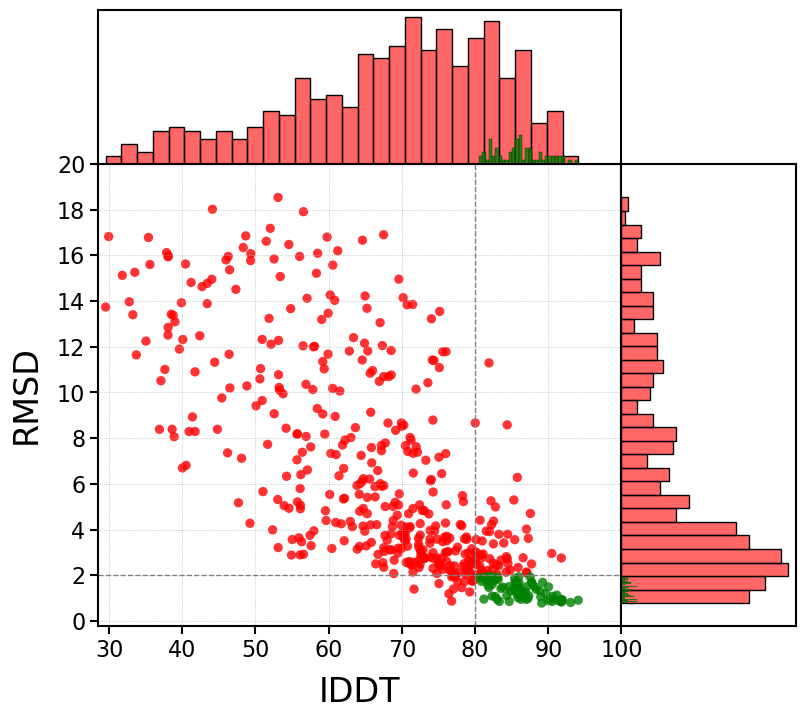

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec
import numpy as np
import os

# Path to your CSV file
csv_path = "/Users/ayodi/OneDrive/Documents/ccb_intro/rf_diffusion/af2_output/batch_3/data_3_full.csv"
df = pd.read_csv(csv_path)

# Clean and convert
df.columns = [c.strip().lower() for c in df.columns]
df['lddt'] = pd.to_numeric(df['lddt'], errors='coerce')
df['rmsd'] = pd.to_numeric(df['rmsd'], errors='coerce')
df.dropna(subset=['lddt', 'rmsd'], inplace=True)

# Highlight: green = high-quality zone
df['color'] = df.apply(lambda row: 'green' if row['lddt'] > 80 and row['rmsd'] < 2 else 'red', axis=1)

# ========== PLOT SETUP ==========
fig = plt.figure(figsize=(9, 8))
gs = GridSpec(4, 4, figure=fig, wspace=0.0, hspace=0.0)

# ========== MAIN SCATTER ==========
ax_main = fig.add_subplot(gs[1:4, 0:3])
for clr in ['red', 'green']:
    sub = df[df['color'] == clr]
    ax_main.scatter(sub['lddt'], sub['rmsd'], s=45, alpha=0.8, color=clr, edgecolor='none')

ax_main.axhline(2, color='gray', linestyle='--', linewidth=1)
ax_main.axvline(80, color='gray', linestyle='--', linewidth=1)

# Ticks, limits, and labels
ax_main.set_xlim(df['lddt'].min() - 1, df['lddt'].max() + 1)
ax_main.set_ylim(df['rmsd'].min() - 1, df['rmsd'].max() + 1)
ax_main.set_xticks(np.arange(30, 101, 10))
ax_main.set_yticks(np.arange(0, 21, 2))
ax_main.tick_params(axis='both', direction='out', length=6, width=1.5, labelsize=16)
ax_main.set_xlabel('IDDT', fontsize=24, labelpad=10)
ax_main.set_ylabel('RMSD', fontsize=24, labelpad=10)

# Frame styling
for spine in ['left', 'bottom', 'top', 'right']:
    ax_main.spines[spine].set_visible(True)
    ax_main.spines[spine].set_color('black')
    ax_main.spines[spine].set_linewidth(1.5)

ax_main.grid(True, linestyle=':', linewidth=0.5)

# ========== TOP HISTOGRAM ==========
ax_histx = fig.add_subplot(gs[0, 0:3], sharex=ax_main)
sns.histplot(data=df, x='lddt', bins=30, ax=ax_histx, color='red', edgecolor='black', alpha=0.6)
sns.histplot(data=df[df['color'] == 'green'], x='lddt', bins=30, ax=ax_histx, color='green', edgecolor='black', alpha=0.8)

# Remove axis labels and ticks
ax_histx.set_xlabel('')
ax_histx.set_ylabel('')
ax_histx.tick_params(labelbottom=False, labelleft=False, bottom=False, left=False)

# Show all borders
for spine in ['left', 'right', 'top', 'bottom']:
    ax_histx.spines[spine].set_visible(True)
    ax_histx.spines[spine].set_color('black')
    ax_histx.spines[spine].set_linewidth(1.5)

# ========== RIGHT HISTOGRAM ==========
ax_histy = fig.add_subplot(gs[1:4, 3], sharey=ax_main)
sns.histplot(data=df, y='rmsd', bins=30, ax=ax_histy, color='red', edgecolor='black', alpha=0.6)
sns.histplot(data=df[df['color'] == 'green'], y='rmsd', bins=30, ax=ax_histy, color='green', edgecolor='black', alpha=0.8)

# Remove axis labels and ticks
ax_histy.set_xlabel('')
ax_histy.set_ylabel('')
ax_histy.tick_params(labelbottom=False, labelleft=False, bottom=False, left=False)

# Show all borders
for spine in ['left', 'right', 'top', 'bottom']:
    ax_histy.spines[spine].set_visible(True)
    ax_histy.spines[spine].set_color('black')
    ax_histy.spines[spine].set_linewidth(1.5)

# ========== SAVE ==========
output_path = os.path.join(os.path.dirname(csv_path), "rmsd_lddt_beautiful_plot.tiff")
plt.savefig(output_path, dpi=300, bbox_inches='tight')
plt.show()

print(f"Saved: {output_path}")

<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:3: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:3: SyntaxWarning: invalid escape sequence '\s'
C:\Users\ayodi\AppData\Local\Temp\ipykernel_13636\2546777109.py:1: SyntaxWarning: invalid escape sequence '\s'
  df18 = pd.read_csv('/Users/ayodi/OneDrive/Documents/ccb_intro/rf_diffusion/af2_output/success_test1/model1/model1_rmsd.dat',sep="\s+", header = None, skiprows = 2)
C:\Users\ayodi\AppData\Local\Temp\ipykernel_13636\2546777109.py:2: SyntaxWarning: invalid escape sequence '\s'
  df19 = pd.read_csv('/Users/ayodi/OneDrive/Documents/ccb_intro/rf_diffusion/af2_output/success_test1/model2/model2_rmsd.dat',sep="\s+", header = None, skiprows = 2)
C:\Users\ayodi\AppData\Local\Temp\ipykernel_13636\2546777109.py:3: SyntaxWarning: invalid escape sequence '\s'
  df20 = pd.read_csv('/Users/ayodi/

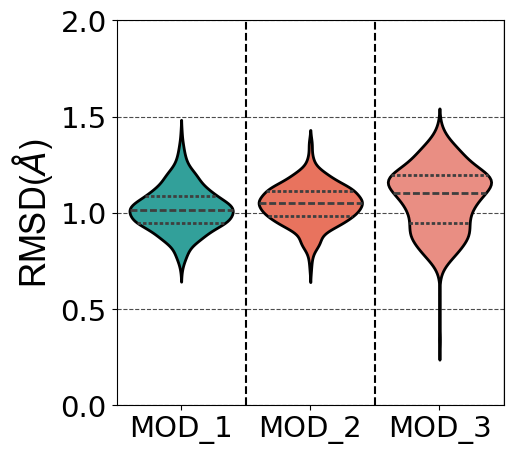

In [29]:
df18 = pd.read_csv('/Users/ayodi/OneDrive/Documents/ccb_intro/rf_diffusion/af2_output/success_test1/model1/model1_rmsd.dat',sep="\s+", header = None, skiprows = 2)
df19 = pd.read_csv('/Users/ayodi/OneDrive/Documents/ccb_intro/rf_diffusion/af2_output/success_test1/model2/model2_rmsd.dat',sep="\s+", header = None, skiprows = 2)
df20 = pd.read_csv('/Users/ayodi/OneDrive/Documents/ccb_intro/rf_diffusion/af2_output/success_test1/model3/model3_rmsd.dat',sep="\s+", header = None, skiprows = 2)

data_df = pd.DataFrame({
    'MOD_1': df18[1],
    'MOD_2': df19[1],
    'MOD_3': df20[1]
})
colors = ['lightseagreen', 'tomato', 'salmon']
fig, ax = plt.subplots(figsize=(5, 5))

violin = sns.violinplot(data=data_df, palette=colors, linewidth=2.0, width=0.8, inner='quartile', ax=ax)

# Customize each violin's edge and quartile lines to be black
for i, artist in enumerate(ax.collections):
    # Set edge color to black for each violin
    artist.set_edgecolor("black")
    artist.set_linewidth(2)

# Customize x-ticks
plt.xticks(ticks=[0, 1, 2], labels=['MOD_1', 'MOD_2', 'MOD_3'], fontsize=20)

# Add vertical lines for additional styling
ax.axvline(0.5, color='black', linestyle='--')
ax.axvline(1.5, color='black', linestyle='--')
ax.axvline(2.5, color='black', linestyle='-', linewidth=0.2)
plt.grid(axis='y', color='black', linestyle='--', linewidth=0.8, alpha=0.7)
plt.gca().set_axisbelow(True)
plt.ylim(0, 2)
ax.tick_params(axis='both', which='major', labelsize=21)
# Customize y-ticks and labels
#plt.yticks(ticks=range(0, 3, 1), fontsize=25)
plt.ylabel(r"RMSD($\AA$)", fontsize = 25, fontname="Arial")
# Save plot as TIFF with 600 dpi
plt.savefig('/Users/ayodi/OneDrive/Documents/ccb_intro/rf_diffusion/af2_output/success_test1/lig_rmsd_site2.tiff', dpi=600, bbox_inches="tight")
plt.show()

C:\Users\ayodi\AppData\Local\Temp\ipykernel_4176\1025068778.py:25: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(path, delim_whitespace=True, skiprows=1, header=None, names=["Residue", "RMSF"])
C:\Users\ayodi\AppData\Local\Temp\ipykernel_4176\1025068778.py:25: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(path, delim_whitespace=True, skiprows=1, header=None, names=["Residue", "RMSF"])
C:\Users\ayodi\AppData\Local\Temp\ipykernel_4176\1025068778.py:25: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(path, delim_whitespace=True, skiprows=1, header=None, names=["Residue", "RMSF"])


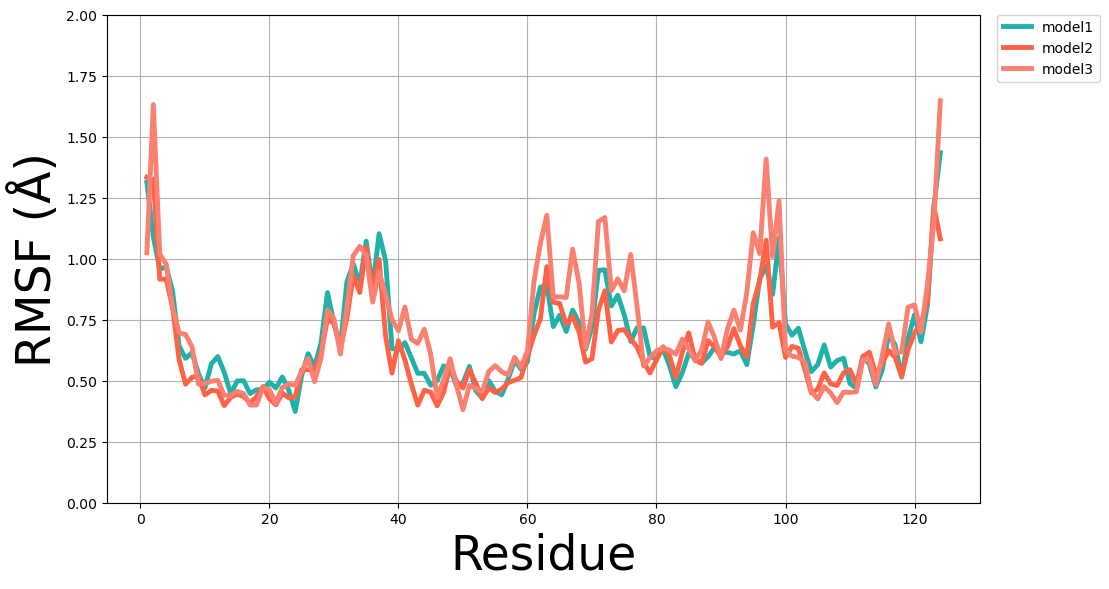

Saved plots:
- /Users/ayodi/OneDrive/Documents/ccb_intro/rf_diffusion/af2_output/success_test1\rmsf_comparison.png
- /Users/ayodi/OneDrive/Documents/ccb_intro/rf_diffusion/af2_output/success_test1\rmsf_comparison.pdf


In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Directory containing the RMSF files
rmsf_dir = "/Users/ayodi/OneDrive/Documents/ccb_intro/rf_diffusion/af2_output/success_test1"

# List of colors to use
colors = ['lightseagreen', 'tomato', 'salmon']

# Collect RMSF files
rmsf_files = [f for f in os.listdir(rmsf_dir) if f.endswith('_rmsf.dat')]
rmsf_files.sort()  # Ensure consistent color ordering

# Plot setup
plt.figure(figsize=(10, 6))

# Plot each file
for idx, file in enumerate(rmsf_files):
    path = os.path.join(rmsf_dir, file)
    df = pd.read_csv(path, delim_whitespace=True, skiprows=1, header=None, names=["Residue", "RMSF"])

    label = file.replace('_rmsf.dat', '')
    color = colors[idx % len(colors)]
    plt.plot(df["Residue"], df["RMSF"], label=label, color=color, linewidth=3.5)

# Style
plt.xlabel("Residue", fontsize=34)
plt.ylabel("RMSF (Å)", fontsize=34)
plt.ylim(0, 2.0)
plt.grid(True)
plt.tight_layout()

# Legend outside the box (top-right)
plt.legend(loc='upper left', bbox_to_anchor=(1.02, 1), borderaxespad=0)

# Save
out_png = os.path.join(rmsf_dir, "rmsf_comparison.png")
out_pdf = os.path.join(rmsf_dir, "rmsf_comparison.pdf")
plt.savefig(out_png, dpi=300, bbox_inches='tight')
plt.savefig(out_pdf, bbox_inches='tight')

plt.show()
print(f"Saved plots:\n- {out_png}\n- {out_pdf}")

C:\Users\ayodi\AppData\Local\Temp\ipykernel_4176\3411249520.py:21: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(path, delim_whitespace=True, skiprows=1, header=None, names=["Residue", "RMSF"])
C:\Users\ayodi\AppData\Local\Temp\ipykernel_4176\3411249520.py:21: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(path, delim_whitespace=True, skiprows=1, header=None, names=["Residue", "RMSF"])
C:\Users\ayodi\AppData\Local\Temp\ipykernel_4176\3411249520.py:21: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(path, delim_whitespace=True, skiprows=1, header=None, names=["Residue", "RMSF"])


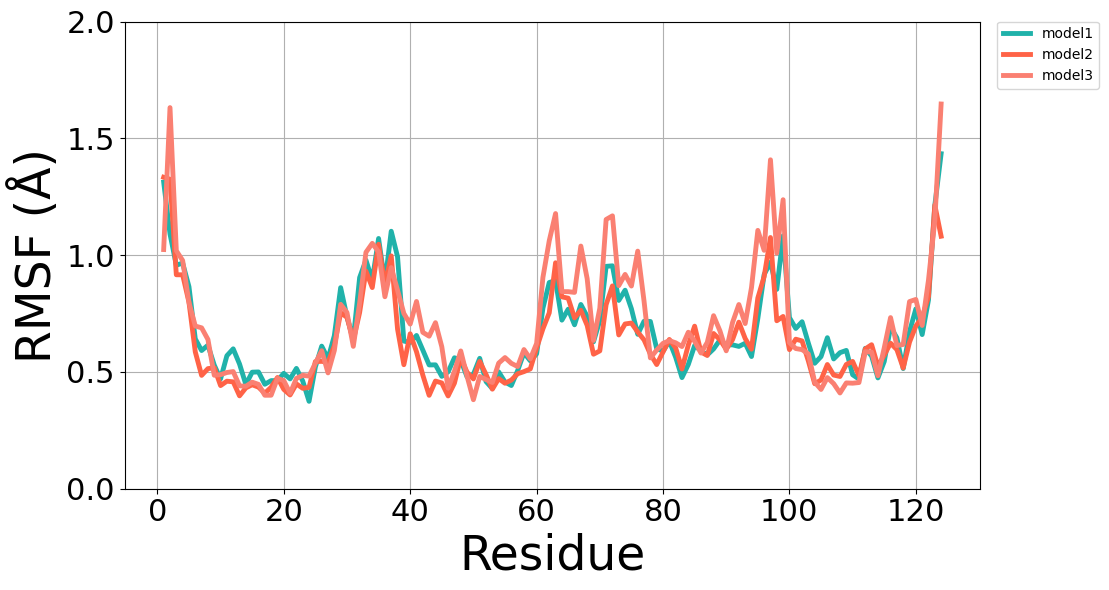

Saved plots:
- /Users/ayodi/OneDrive/Documents/ccb_intro/rf_diffusion/af2_output/success_test1\rmsf_comparison.png
- /Users/ayodi/OneDrive/Documents/ccb_intro/rf_diffusion/af2_output/success_test1\rmsf_comparison.pdf


In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Directory containing the RMSF files
rmsf_dir = "/Users/ayodi/OneDrive/Documents/ccb_intro/rf_diffusion/af2_output/success_test1"

# List of colors to use
colors = ['lightseagreen', 'tomato', 'salmon']

# Collect RMSF files
rmsf_files = [f for f in os.listdir(rmsf_dir) if f.endswith('_rmsf.dat')]
rmsf_files.sort()  # Ensure consistent color ordering

# Plot setup
plt.figure(figsize=(10, 6))

# Plot each file
for idx, file in enumerate(rmsf_files):
    path = os.path.join(rmsf_dir, file)
    df = pd.read_csv(path, delim_whitespace=True, skiprows=1, header=None, names=["Residue", "RMSF"])

    label = file.replace('_rmsf.dat', '')
    color = colors[idx % len(colors)]
    plt.plot(df["Residue"], df["RMSF"], label=label, color=color, linewidth=3.5)

# Style
plt.xlabel("Residue", fontsize=34)
plt.ylabel("RMSF (Å)", fontsize=34)
plt.tick_params(axis='both', labelsize=22)  # <<< Enlarges tick labels
plt.ylim(0, 2.0)
plt.grid(True)
plt.tight_layout()

# Legend outside the box
plt.legend(loc='upper left', bbox_to_anchor=(1.02, 1), borderaxespad=0)

# Save
out_png = os.path.join(rmsf_dir, "rmsf_comparison.png")
out_pdf = os.path.join(rmsf_dir, "rmsf_comparison.pdf")
plt.savefig(out_png, dpi=300, bbox_inches='tight')
plt.savefig(out_pdf, bbox_inches='tight')

plt.show()
print(f"Saved plots:\n- {out_png}\n- {out_pdf}")